## Importing required libraries

In [2]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import pylab as pl

## Reading the data in

In [3]:
df = pd.read_csv("FuelConsumptionCo2.csv")
df.head()

,MODELYEAR,MAKE,MODEL,VEHICLECLASS,ENGINESIZE,CYLINDERS,TRANSMISSION,FUELTYPE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
0,2014,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,2014,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,2014,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,2014,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,2014,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244


## Data Exploration

In [4]:
df.describe()

,MODELYEAR,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
count,1067.0,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000
mean,2014.0,3.346298,5.794752,13.296532,9.474602,11.580881,26.441425,256.228679
std,0.0,1.415895,1.797447,4.101253,2.794510,3.485595,7.468702,63.372304
min,2014.0,1.000000,3.000000,4.600000,4.900000,4.700000,11.000000,108.000000
25%,2014.0,2.000000,4.000000,10.250000,7.500000,9.000000,21.000000,207.000000
50%,2014.0,3.400000,6.000000,12.600000,8.800000,10.900000,26.000000,251.000000
75%,2014.0,4.300000,8.000000,15.550000,10.850000,13.350000,31.000000,294.000000
max,2014.0,8.400000,12.000000,30.200000,20.500000,25.800000,60.000000,488.000000


In [5]:
cdf = df[['ENGINESIZE','CYLINDERS','FUELCONSUMPTION_COMB','CO2EMISSIONS','FUELCONSUMPTION_CITY']]
cdf.head(9)

,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_COMB,CO2EMISSIONS,FUELCONSUMPTION_CITY
0,2.0,4,8.5,196,9.9
1,2.4,4,9.6,221,11.2
2,1.5,4,5.9,136,6.0
3,3.5,6,11.1,255,12.7
4,3.5,6,10.6,244,12.1
5,3.5,6,10.0,230,11.9
6,3.5,6,10.1,232,11.8
7,3.7,6,11.1,255,12.8
8,3.7,6,11.6,267,13.4


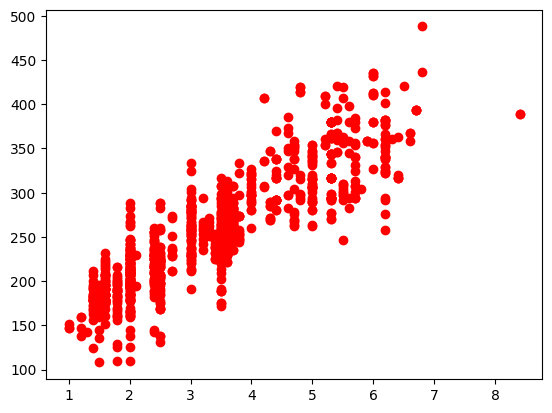

In [6]:
plt.scatter(cdf.ENGINESIZE , cdf.CO2EMISSIONS, color="red")

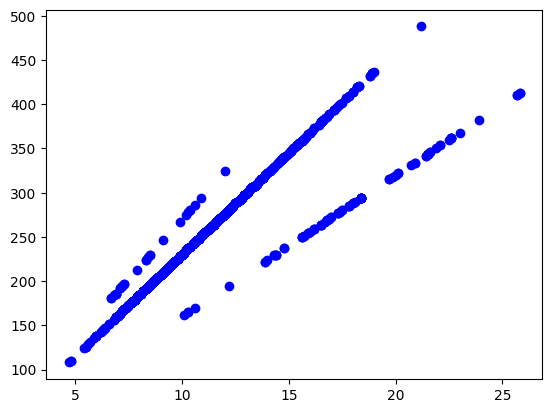

In [7]:
plt.scatter(cdf.FUELCONSUMPTION_COMB , cdf.CO2EMISSIONS, color="blue")

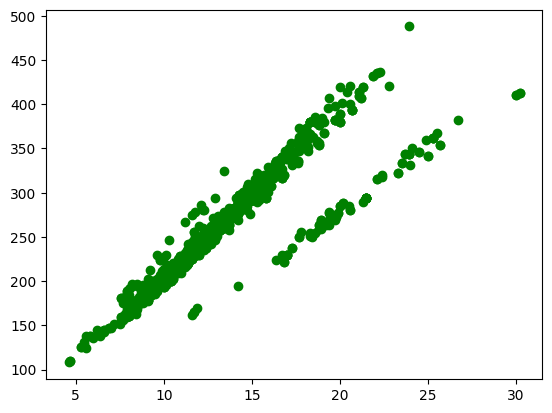

In [8]:
plt.scatter(cdf.FUELCONSUMPTION_CITY , cdf.CO2EMISSIONS, color="green")

## Creating train and test dataset

In [ ]:
msk = np.random.rand(len(df))<.8
train=cdf[msk]
test=cdf[~msk]

## Multiple regression

In [13]:
from sklearn import linear_model
regr = linear_model.LinearRegression()
train_x = np.asanyarray(train[['FUELCONSUMPTION_CITY','FUELCONSUMPTION_COMB','ENGINESIZE']])
train_y = np.asanyarray(train[['CO2EMISSIONS']])
regr.fit(train_x,train_y)
print("coefficients : ", regr.coef_)
print("intecept : " , regr.intercept_)
train_x

coefficients :  [[ 5.08168268  3.77084528 19.33264441]]
intecept :  [80.76932371]


array([[ 9.9,  8.5,  2. ],
       [11.2,  9.6,  2.4],
       [12.7, 11.1,  3.5],
       ...,
       [13.2, 11.5,  3.2],
       [12.9, 11.3,  3.2],
       [14.9, 12.8,  3.2]], shape=(842, 3))

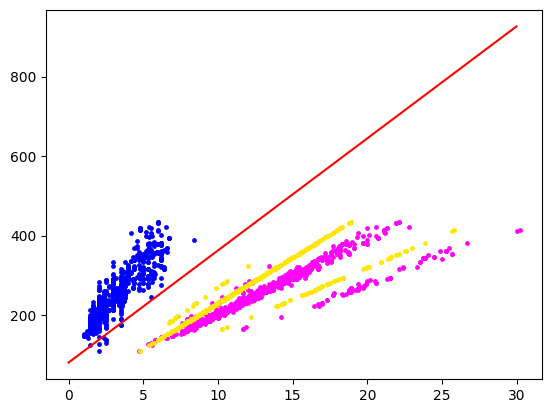

In [18]:
plt.scatter(train.ENGINESIZE, train.CO2EMISSIONS,  color='blue', s=6)
plt.scatter(train.FUELCONSUMPTION_CITY, train.CO2EMISSIONS,  color='#FF05FA', s=6)
plt.scatter(train.FUELCONSUMPTION_COMB, train.CO2EMISSIONS,  color='#FFE605', s=6)
XX = np.arange(0.0,30.0,0.01)
YY = regr.intercept_[0] + regr.coef_[0][0] * XX + regr.coef_[0][1] * XX + regr.coef_[0][2] * XX
plt.plot(XX,YY , "-r")

## Evaluation

In [19]:
from sklearn.metrics import r2_score
test_x = np.asanyarray(test[['FUELCONSUMPTION_CITY','FUELCONSUMPTION_COMB','ENGINESIZE']])
test_y = np.asanyarray(test[['CO2EMISSIONS']])
test_y_hat = regr.predict(test_x)
print("Residual sum of squares : %.2f" % np.mean((test_y_hat - test_y)**2))
print("Variance score : %.2f" % regr.score(test_x,test_y))
print("R2_Score : %.2f" % r2_score(test_y,test_y_hat))

Residual sum of squares : 570.58
Variance score : 0.87
R2_Score : 0.87
